# Explorary Data Analysis

## Import Basic Libraries 

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

## Data Cleaning and Preprocessing

In [2]:
vg = pd.read_csv("video_games_sales.csv")

vg = vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})

print(f"Distribution of the Variable and Data Types in the Dataset:\n{vg.info()}\n\n")
print(f"Columns Names in the Dataframe:\n{vg.columns.tolist()}\n\n")
print(f"Quantity of of null/missing data entries:\n{vg.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sales Rank                          16598 non-null  int64  
 1   name                                16598 non-null  object 
 2   platform                            16598 non-null  object 
 3   year                                16327 non-null  float64
 4   genre                               16598 non-null  object 
 5   publisher                           16540 non-null  object 
 6   North American Sales (in millions)  16598 non-null  float64
 7   European Sales (in millions)        16598 non-null  float64
 8   Japan Sales (in millions)           16598 non-null  float64
 9   Other Sales (in millions)           16598 non-null  float64
 10  Global Sales (in millions)          16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory

In [3]:
vg.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
North American Sales (in millions),16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
European Sales (in millions),16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
Japan Sales (in millions),16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other Sales (in millions),16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global Sales (in millions),16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [4]:
vg.head(10)

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions),European Sales (in millions),Japan Sales (in millions),Other Sales (in millions),Global Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


The table above shows the summary stats of the numerical variables in the datasets, each row is assigned to each variable.

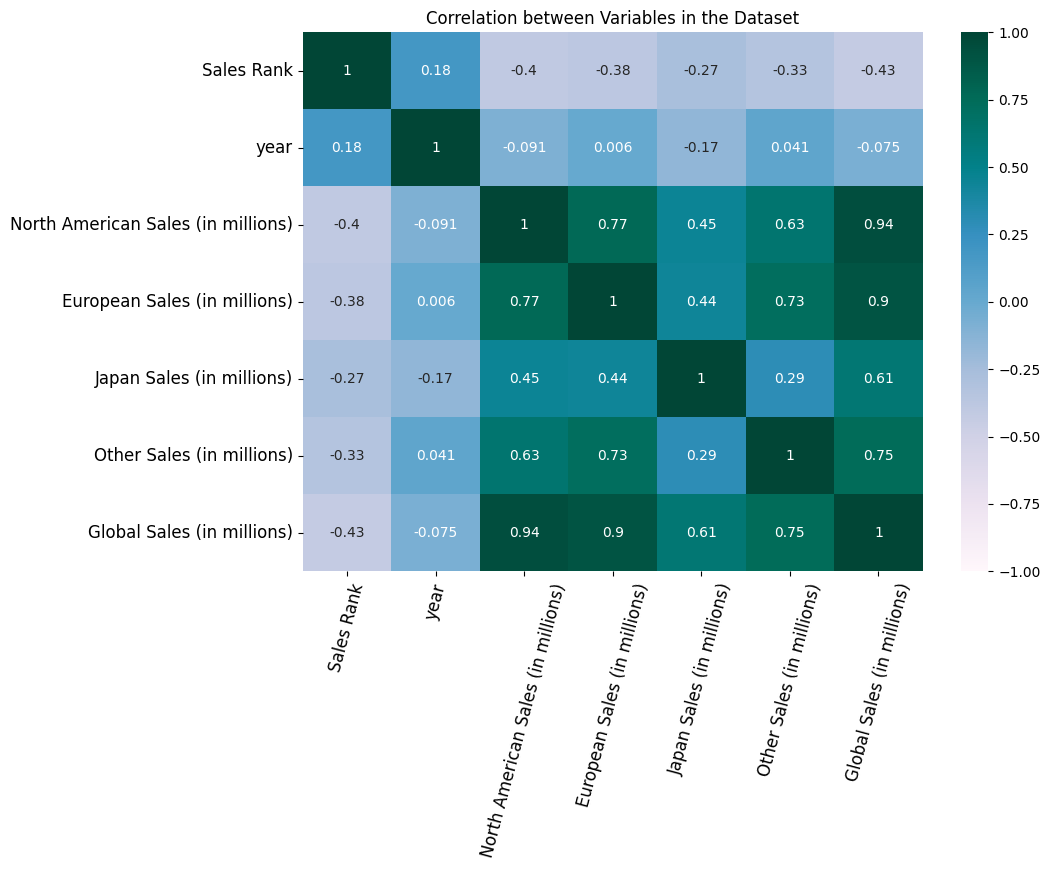

In [5]:
vg_numeric = vg.select_dtypes(include = ["int64","float64"])
corr_matrix = vg_numeric.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation between Variables in the Dataset")
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.show()

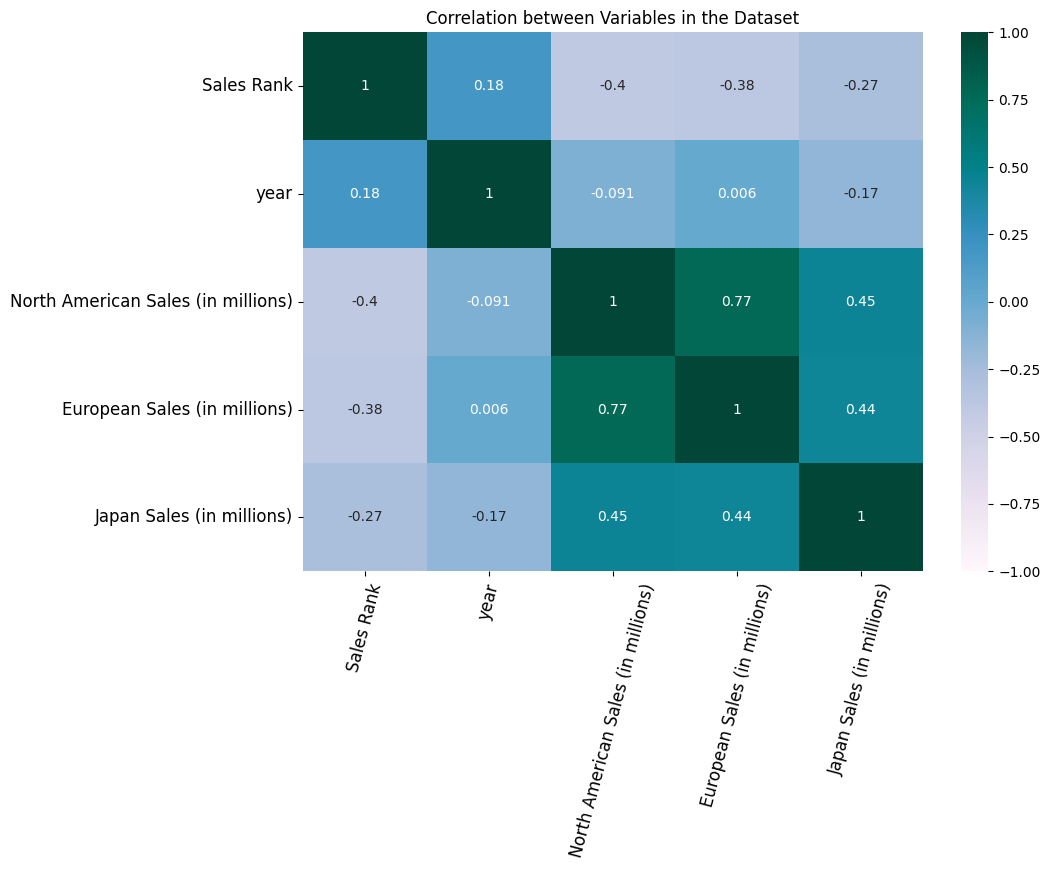

In [6]:
vg_refined = vg.drop(columns = ["Other Sales (in millions)", "Global Sales (in millions)"])
vg_numeric = vg_refined.select_dtypes(include = ["int64","float64"])
corr_matrix = vg_numeric.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation between Variables in the Dataset")
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.show()

## Decision Tree

### Version 1

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
import sklearn.model_selection as ms

#Used in Version 2 
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [8]:
X = vg_refined.drop(columns = ["Sales Rank", "North American Sales (in millions)"])
Y = vg_refined["North American Sales (in millions)"]
print(f"Dimensionality of the Predictors:\n{X.shape}\n")
print(f"Dimensionality of the Response Variable:\n{Y.shape}\n")
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

Dimensionality of the Predictors:
(16598, 7)

Dimensionality of the Response Variable:
(16598,)



In [9]:
na_decision = DecisionTreeRegressor(random_state = 42) #DecisionTreeRegressor is made for continuous variables 
na_decision.fit(X_train, Y_train)
y_pred = na_decision.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)  #Mean Squared Error is a common metric for regression
print(f"Mean Squared Error: {mse:.5f}\n")

r2 = r2_score(Y_test, y_pred) #Evaluates the model accuracy
print(f"R² Score: {r2:.5f}")

Mean Squared Error: 0.50607

R² Score: 0.23000


In [10]:
cross_val_r2 = cross_val_score(na_decision, X, Y, cv=5, scoring='r2')
print(f"Cross-validated R² Scores: {cross_val_r2}\n")
print(f"Mean Cross-validated R²: {cross_val_r2.mean():.5f}\n")
print(f"Standard Deviation of R² Scores: {cross_val_r2.std():.5f}\n")

Cross-validated R² Scores: [-2.68843235e-01 -1.63758958e+01 -2.84306142e+01 -3.77095039e+01
 -4.93064079e+02]

Mean Cross-validated R²: -115.16979

Standard Deviation of R² Scores: 189.36226



In [11]:
depth_val = np.arange(2,16)
leaf_val = np.arange(1,31, step=10)

grid_s = [{'max_depth': depth_val,'min_samples_leaf': leaf_val}]
model = tree.DecisionTreeRegressor(criterion='friedman_mse')

cv_tree = GridSearchCV(estimator=model,param_grid=grid_s,cv=ms.KFold(n_splits=10))
cv_tree.fit(X_train, Y_train)

best_depth = cv_tree.best_params_['max_depth']

best_min_samples = cv_tree.best_params_['min_samples_leaf']

print(best_depth, best_min_samples)

final_model = tree.DecisionTreeRegressor(
    criterion='friedman_mse',
    max_depth=best_depth,
    min_samples_leaf=best_min_samples,
    random_state=123
)
final_model.fit(X_train, Y_train)

10 1


DecisionTreeRegressor(criterion='friedman_mse', max_depth=np.int64(10),
                      min_samples_leaf=np.int64(1), random_state=123)

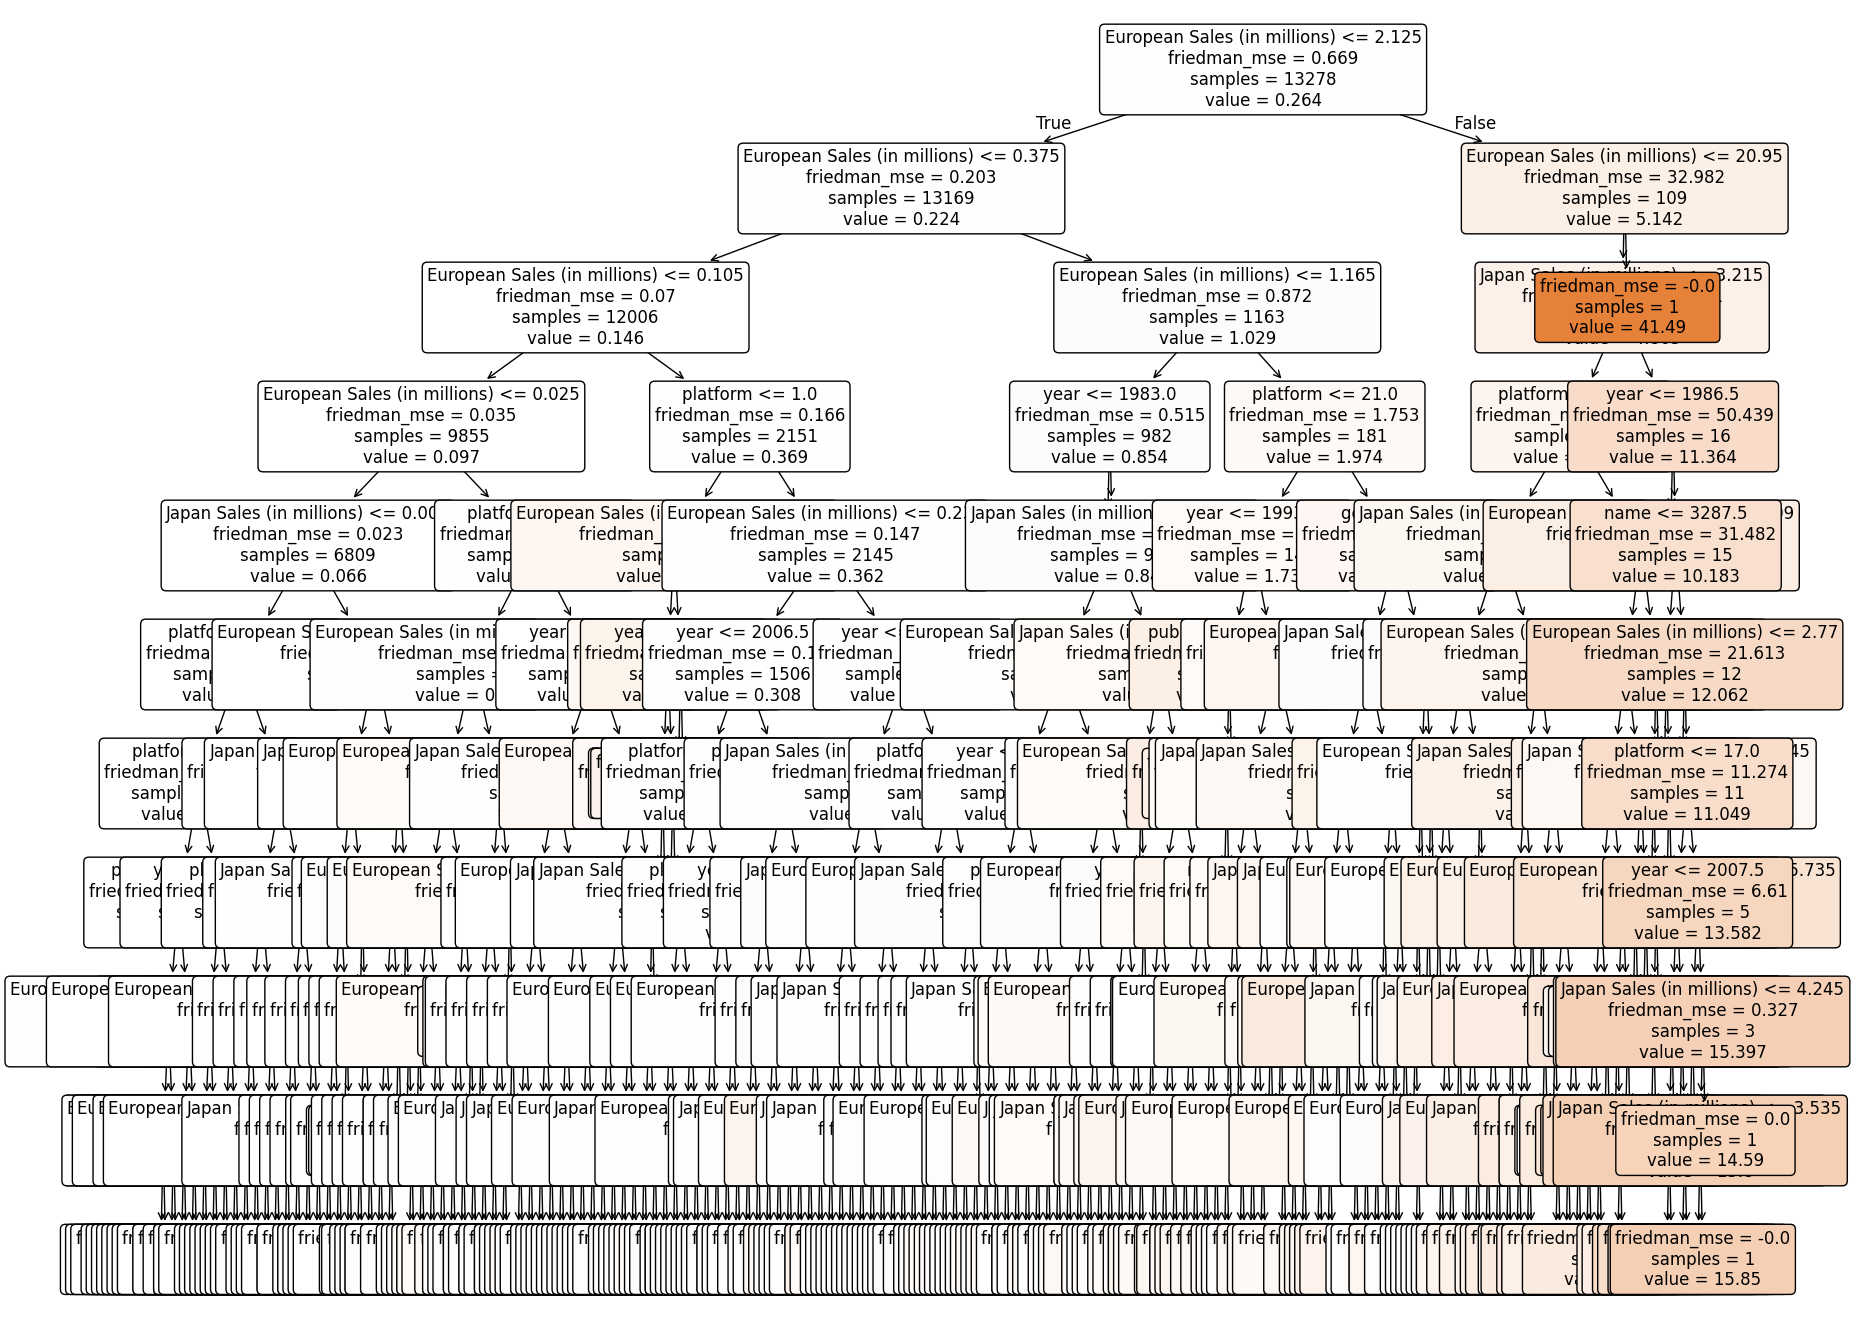

In [12]:
plt.figure(figsize=(20,17))
tree.plot_tree(
    final_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.savefig("Feature Importance in Predicting North American Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

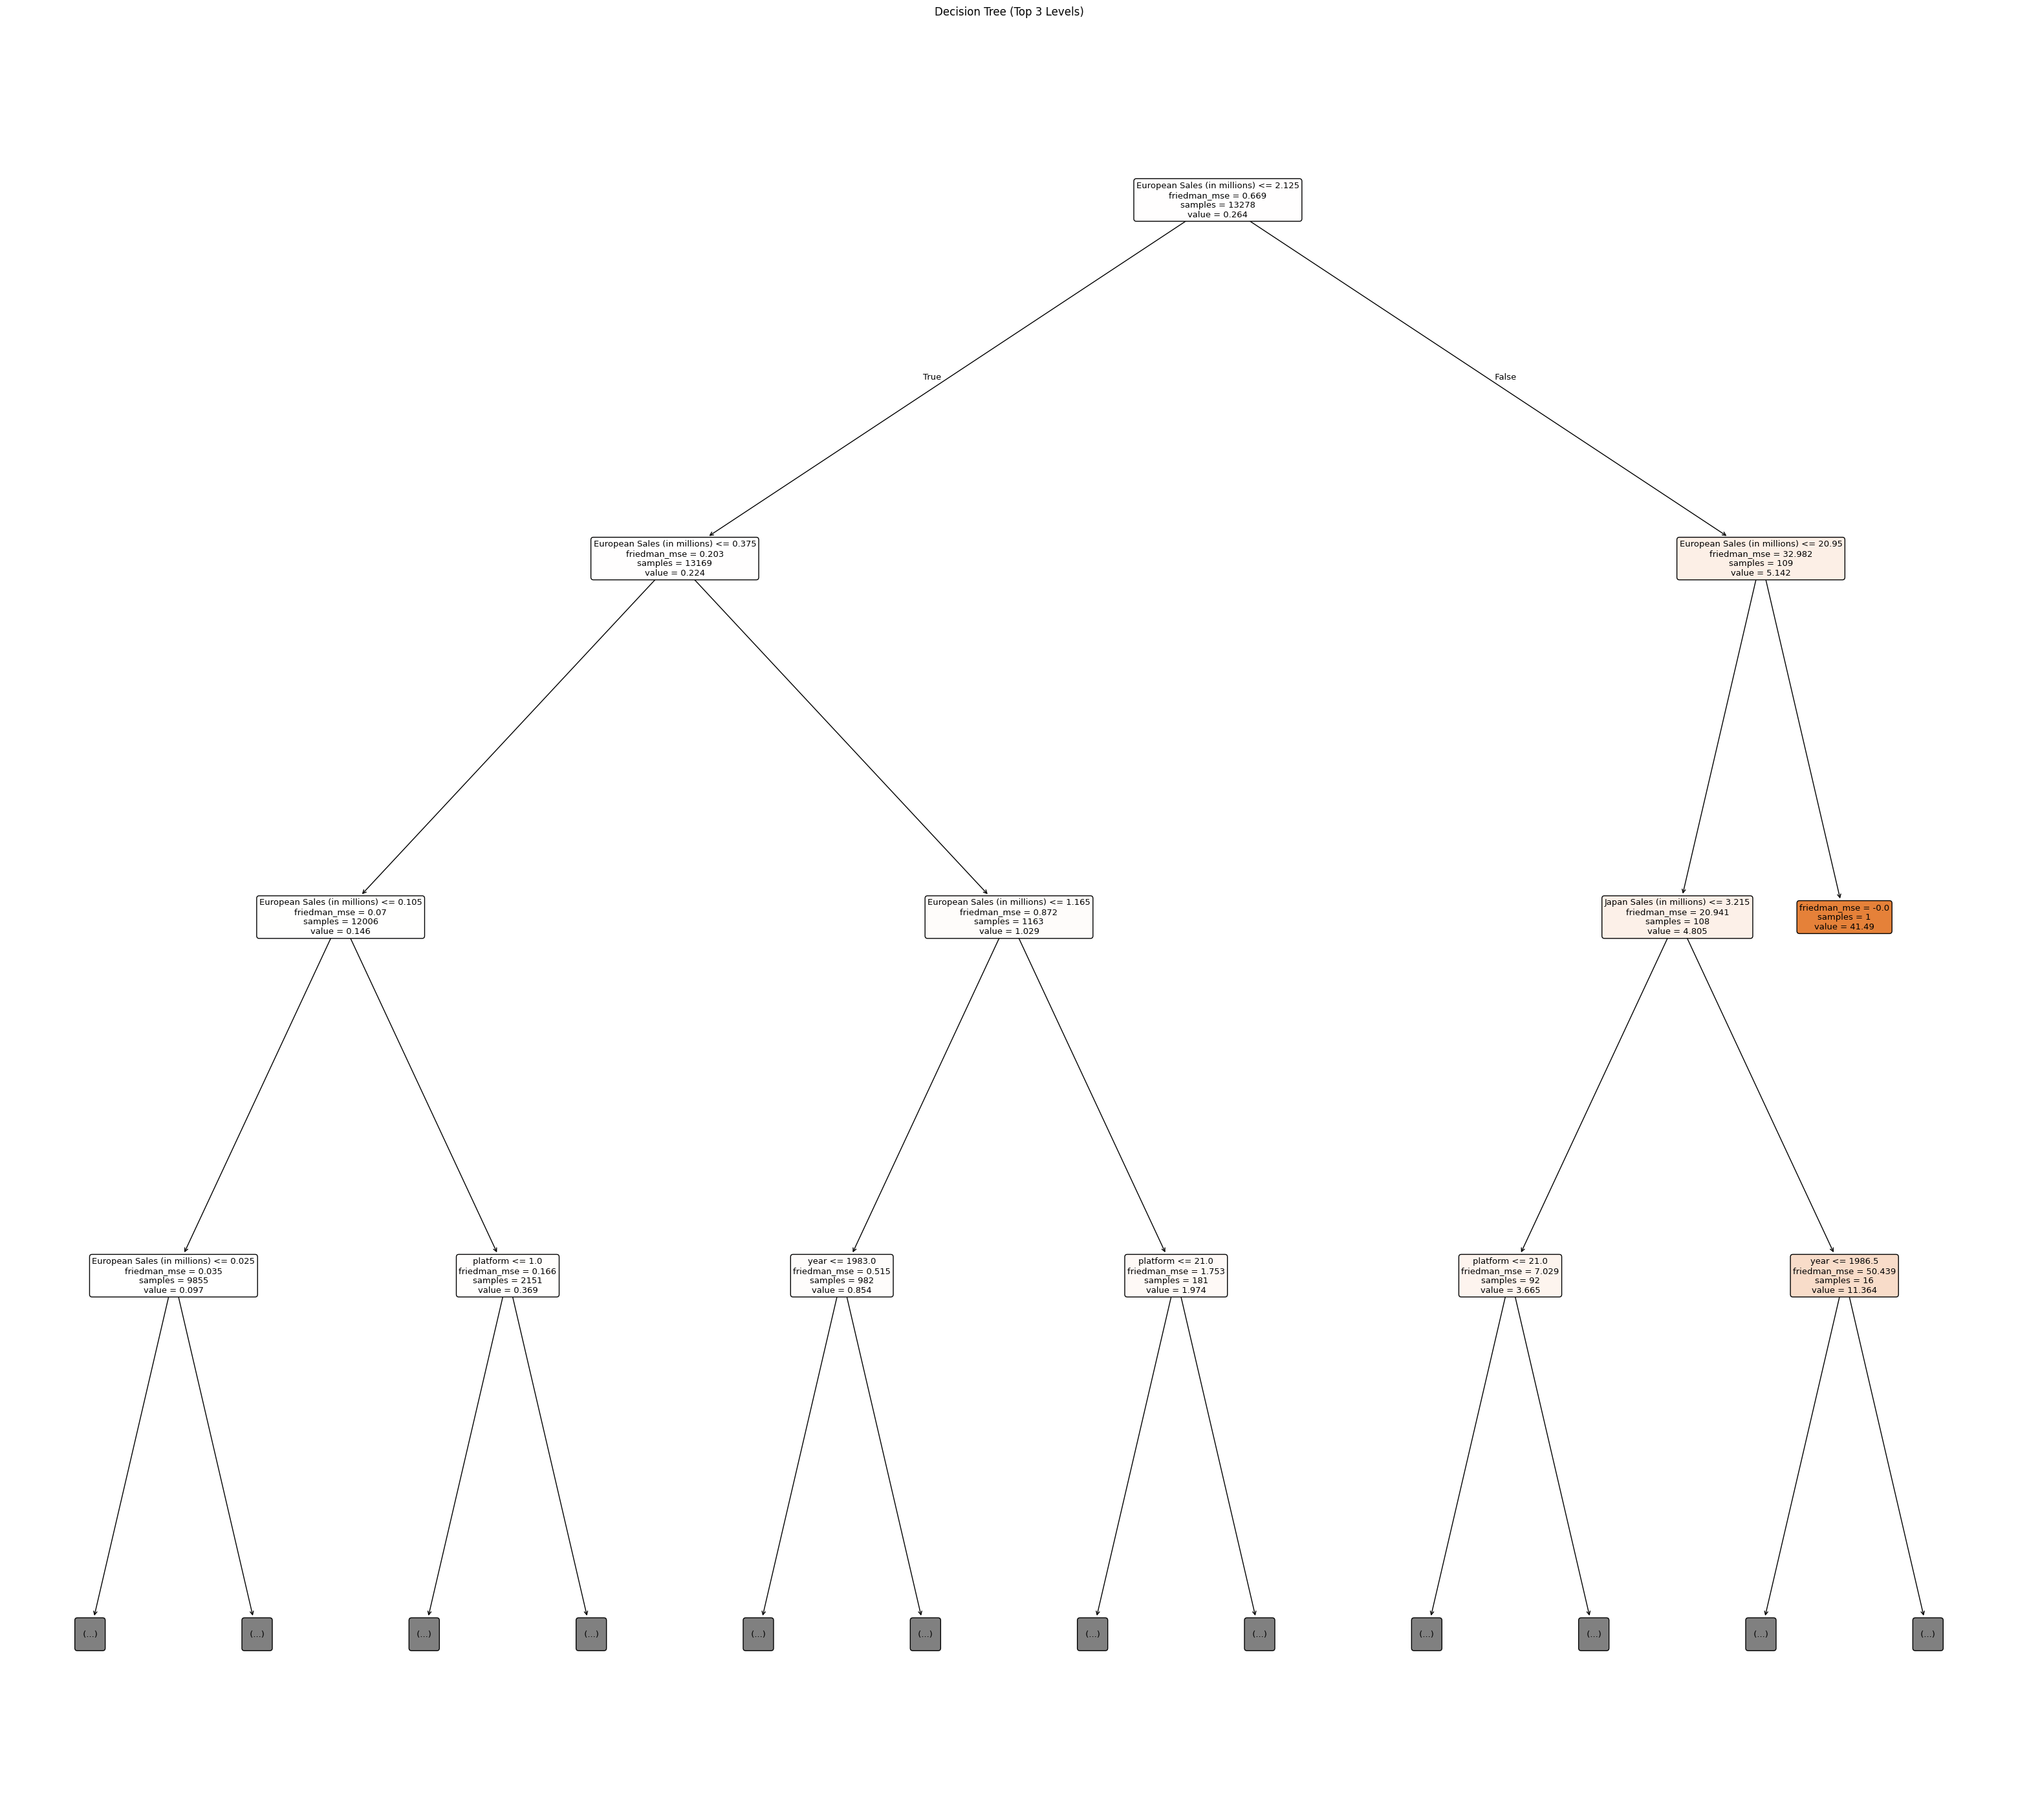

In [13]:
plt.figure(figsize=(40, 36))
tree.plot_tree(final_model, max_depth=3, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree (Top 3 Levels)")
plt.savefig("Decision Tree (Top 3 Levels).png", bbox_inches = "tight", dpi = 300)
plt.show()

In [14]:
# Predictions
Y_pred = final_model.predict(X_test)

# Metrics
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.5f}")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")

R² Score: 0.26569
MSE: 0.48262
RMSE: 0.69471


### Version 2

In [15]:
predictors = vg_refined.drop(columns=["Sales Rank", "North American Sales (in millions)"])
response = vg_refined["North American Sales (in millions)"]

numeric_features = predictors.select_dtypes(include=['int64','float64']).columns
categorical_features = predictors.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer( #Preprocessing
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [16]:
pipeline = Pipeline([ #Full XGBoost pipeline
    ('preprocess', preprocess),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        tree_method='hist'
    ))
])

param_grid = { #Hyperparameter grid
    "model__n_estimators": [200, 400],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [4, 6, 8],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=123) #Train-Test Split

In [17]:
grid = GridSearchCV( #Grid Search
    pipeline,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train) #Grid Search is fitted to the model

# Results
print("Best CV Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred)}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best CV Score: 0.6483809649208195
Best Parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 400, 'model__subsample': 1.0}
R² Score: 0.5365241223474757


In [18]:
print(f"MSE Score: {mean_squared_error(y_test, y_pred)}")

MSE Score: 0.304614416415213


<Figure size 5000x4500 with 0 Axes>

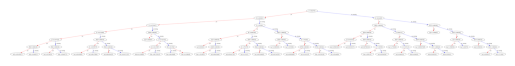

In [22]:
from xgboost import plot_tree
xgb_model = best_model.named_steps["model"] #Extract fitted XGBoost model from pipeline

plt.figure(figsize=(50,45)) #Plots a single tree 
plot_tree(xgb_model, tree_idx=0)
plt.show()

In [23]:
from xgboost import to_graphviz

xgb_model = best_model.named_steps["model"]

# Export tree index 0
dot = to_graphviz(xgb_model, tree_idx=0)
dot.render("xgb_tree_video_games")   # Produces xgb_tree_0.pdf


'xgb_tree_0.pdf'

10246 10246


<Figure size 1400x1000 with 0 Axes>

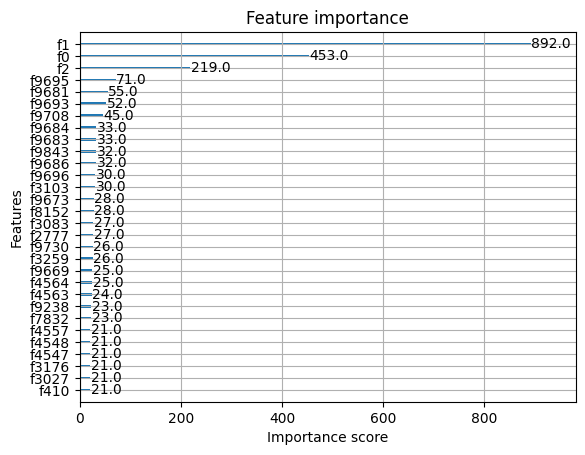

In [24]:
from sklearn.compose import ColumnTransformer

preprocess = best_model.named_steps["preprocess"]
xgb_model = best_model.named_steps["model"]

# Recover names after preprocessing
feature_names = []

# Numerical features
num_features = preprocess.named_transformers_["num"].get_feature_names_out()
feature_names.extend(num_features)

# Categorical features (OHE expands them)
cat_features = preprocess.named_transformers_["cat"].get_feature_names_out()
feature_names.extend(cat_features)

# Sanity check: Should match xgb_model.n_features_in_
print(len(feature_names), xgb_model.n_features_in_)
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import plot_importance

plt.figure(figsize=(14,10))
plot_importance(xgb_model, max_num_features=30)
plt.show()